# 資料預處理

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
import tensorflow.keras.utils as np_utils
import numpy as np
np.random.seed(10)

In [4]:
from tensorflow.keras.datasets import mnist 
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train=x_train_image.reshape(-1,784).astype('float32')
x_test=x_test_image.reshape(-1,784).astype('float32')

In [6]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [7]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [8]:
print('Train feature:',x_train_normalize.shape)
print('Train label:',y_train_onehot.shape)

Train feature: (60000, 784)
Train label: (60000, 10)


In [9]:
print('Test feature:',x_test_normalize.shape)
print('Test label:',y_test_onehot.shape)

Test feature: (10000, 784)
Test label: (10000, 10)


# 建立模型

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras import Model 

In [11]:
in_layer = Input(shape=(784,),name='in')

In [12]:
h1_layer=Dense(
    units=256,name='h1',
    kernel_initializer='normal',
    activation='relu')(in_layer)

In [13]:
out_layer=Dense(
    units=10,name='out',
    kernel_initializer='normal',
    activation='softmax')(h1_layer)

In [14]:
model = Model(inputs=in_layer, outputs=out_layer)

In [15]:
model = Model(inputs=in_layer,outputs=out_layer)

In [16]:
print(model.summary()) 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in (InputLayer)             [(None, 784)]             0         
                                                                 
 h1 (Dense)                  (None, 256)               200960    
                                                                 
 out (Dense)                 (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


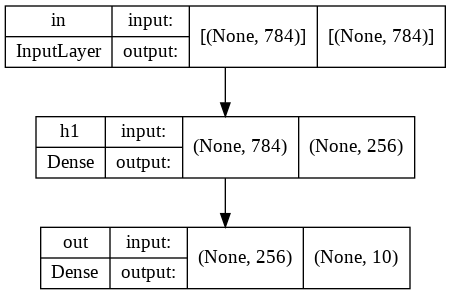

In [17]:
tf.keras.utils.plot_model(model, 'plot_model.png', show_shapes=True)

# 訓練模型

In [18]:
#3.訓練模型

In [19]:
model.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [20]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,validation_split=0.2,
    batch_size=200,epochs=10,verbose=2)

Epoch 1/10
240/240 - 5s - loss: 0.4309 - acc: 0.8864 - val_loss: 0.2214 - val_acc: 0.9388 - 5s/epoch - 23ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1900 - acc: 0.9461 - val_loss: 0.1577 - val_acc: 0.9566 - 1s/epoch - 4ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1355 - acc: 0.9615 - val_loss: 0.1283 - val_acc: 0.9637 - 1s/epoch - 4ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1030 - acc: 0.9711 - val_loss: 0.1135 - val_acc: 0.9662 - 1s/epoch - 4ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0819 - acc: 0.9769 - val_loss: 0.0978 - val_acc: 0.9709 - 1s/epoch - 5ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0653 - acc: 0.9817 - val_loss: 0.0902 - val_acc: 0.9725 - 1s/epoch - 4ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0540 - acc: 0.9854 - val_loss: 0.0856 - val_acc: 0.9755 - 1s/epoch - 5ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0454 - acc: 0.9876 - val_loss: 0.0840 - val_acc: 0.9736 - 915ms/epoch - 4ms/step
Epoch 9/10
240/240 - 1s - loss: 0.0368 - acc: 0.9900 - val_loss: 0.0806 - val_acc: 0.9770 - 1s/epoch

# 以圖形顯示訓練過程

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

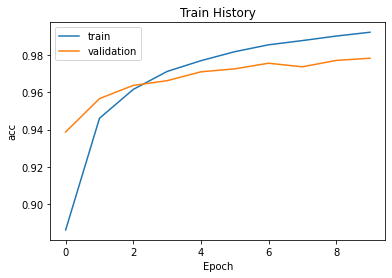

In [22]:
show_train_history(train_history,'acc','val_acc')

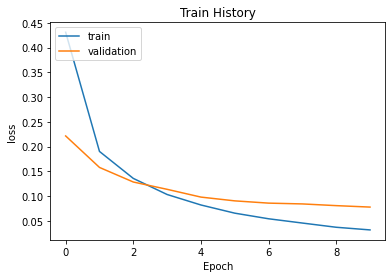

In [23]:
show_train_history(train_history,'loss','val_loss')

# 以圖形顯示訓練過程

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

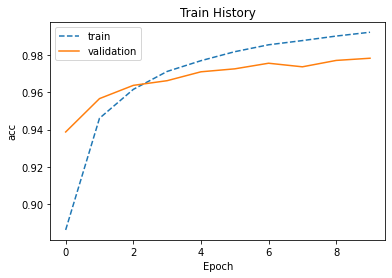

In [25]:
show_train_history(train_history,'acc','val_acc')

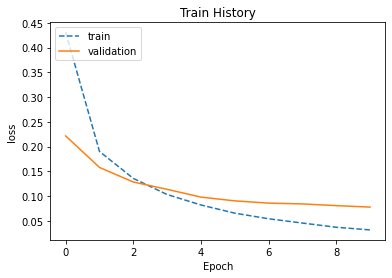

In [26]:
show_train_history(train_history,'loss','val_loss') 

# 評估模型準確率

In [27]:
scores=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 2s - loss: 0.0716 - acc: 0.9777 - 2s/epoch - 5ms/step


In [28]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.07159722596406937 test_acc= 0.9776999950408936


# 進行預測

不能使用model.predict_classes

In [29]:
#prediction=  model.predict_classes(x_test_normalize)

In [31]:
#prediction

建議使用model.predict +tf.argmax 取代

In [32]:
probability = model.predict(x_test_normalize)

In [33]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [34]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

model.predict(x)詳細介紹

In [35]:
probability = model.predict(x_test_normalize)

In [36]:
probability.shape

(10000, 10)

In [37]:
probability [:2]

array([[2.5038466e-07, 9.2414192e-09, 1.0940349e-04, 1.2722285e-03,
        1.2770754e-10, 2.7705860e-07, 1.9952421e-12, 9.9860519e-01,
        7.4290497e-06, 5.2769506e-06],
       [4.1493255e-08, 5.2882187e-06, 9.9998391e-01, 8.6306436e-06,
        8.9363230e-14, 8.3924704e-07, 1.2345059e-07, 5.1722846e-13,
        1.1909771e-06, 1.3166391e-12]], dtype=float32)

tf.argmax詳細介紹

In [38]:
probability[0]

array([2.5038466e-07, 9.2414192e-09, 1.0940349e-04, 1.2722285e-03,
       1.2770754e-10, 2.7705860e-07, 1.9952421e-12, 9.9860519e-01,
       7.4290497e-06, 5.2769506e-06], dtype=float32)

In [39]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [40]:
prediction[0]

7

#predict_class_probability

In [41]:
def predict_class_probability(model, x_feature):
  probability = model.predict(x_feature)
  prediction=tf.argmax(probability, axis=-1).numpy() 
  return prediction,probability

In [42]:
prediction,probability=predict_class_probability(model,x_test_normalize)

In [43]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [44]:
probability[0]

array([2.5038466e-07, 9.2414192e-09, 1.0940349e-04, 1.2722285e-03,
       1.2770754e-10, 2.7705860e-07, 1.9952421e-12, 9.9860519e-01,
       7.4290497e-06, 5.2769506e-06], dtype=float32)

#顯示機率

In [45]:
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[0][i])) 

0  Probability:0.000000250
1  Probability:0.000000009
2  Probability:0.000109403
3  Probability:0.001272229
4  Probability:0.000000000
5  Probability:0.000000277
6  Probability:0.000000000
7  Probability:0.998605192
8  Probability:0.000007429
9  Probability:0.000005277


In [46]:
def show_predicted_probability(images,labels,
     prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',labels[idx])
  if len(labels)>0:print('predict:',prediction[idx])
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[idx][i])) 

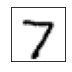

label: 7
predict: 7
0  Probability:0.000000250
1  Probability:0.000000009
2  Probability:0.000109403
3  Probability:0.001272229
4  Probability:0.000000000
5  Probability:0.000000277
6  Probability:0.000000000
7  Probability:0.998605192
8  Probability:0.000007429
9  Probability:0.000005277


In [47]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0)

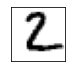

label: 2
predict: 2
0  Probability:0.000000041
1  Probability:0.000005288
2  Probability:0.999983907
3  Probability:0.000008631
4  Probability:0.000000000
5  Probability:0.000000839
6  Probability:0.000000123
7  Probability:0.000000000
8  Probability:0.000001191
9  Probability:0.000000000


In [48]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1)

In [49]:
prediction=tf.argmax(probability, axis=1).numpy()

In [50]:
prediction[0]

7

In [51]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()

In [52]:
prediction 

array([7, 2, 1, ..., 4, 5, 6])

#顯示預測結果

In [53]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

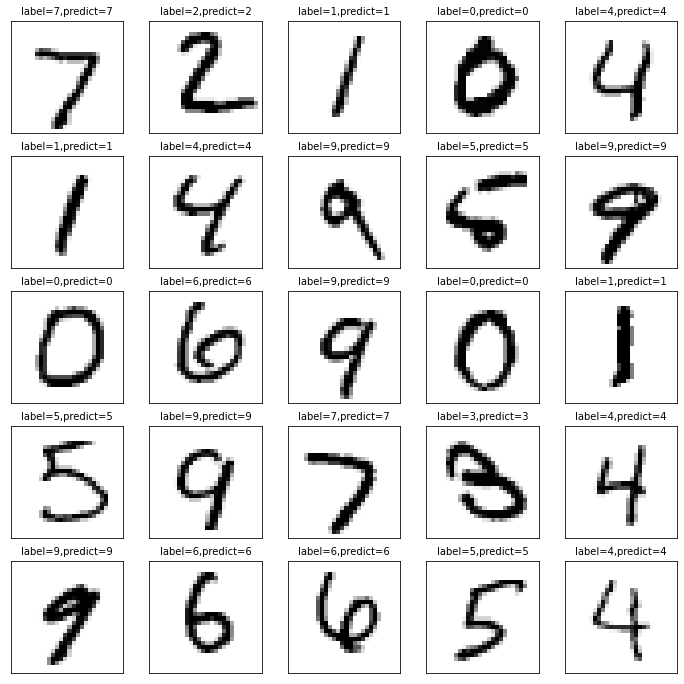

In [54]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0,num=25)

# confusion matrix

In [55]:
import pandas as pd

In [56]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [57]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,3,1,1,0,4,1,1,1
1,0,1122,4,0,0,0,2,2,5,0
2,2,0,1016,2,0,0,2,3,7,0
3,0,0,6,987,0,2,0,4,4,7
4,0,0,6,0,963,0,2,3,1,7
5,2,0,0,8,1,866,5,1,6,3
6,6,4,3,1,3,2,936,0,3,0
7,1,4,12,4,0,0,0,1003,0,4
8,3,0,5,10,2,2,1,4,946,1


# 查看預測錯誤資料

In [58]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [59]:
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [60]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
3902,5,3
5937,5,3
5972,5,3
9482,5,3


# 查看預測錯誤資料

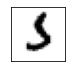

label: 5
predict: 3
0  Probability:0.000000721
1  Probability:0.000727689
2  Probability:0.000015091
3  Probability:0.860465467
4  Probability:0.000001046
5  Probability:0.138597041
6  Probability:0.000044256
7  Probability:0.000000175
8  Probability:0.000114041
9  Probability:0.000034479


In [61]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,340)

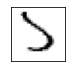

label: 5
predict: 3
0  Probability:0.000007158
1  Probability:0.001135687
2  Probability:0.001016384
3  Probability:0.914106309
4  Probability:0.000001608
5  Probability:0.078921802
6  Probability:0.000562003
7  Probability:0.000214540
8  Probability:0.000616043
9  Probability:0.003418496


In [62]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1393)